In [1]:
%load_ext kedro.ipython

[10/07/24 19:01:36] INFO     Using                                                                  ]8;id=267695;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=19545;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\framework\project\__init__.py#249\249]8;;\
                             'C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\ke                
                             dro\framework\project\rich_logging.yml' as logging configuration.                     

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=879924;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=520409;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=434118;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=857152;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=14494;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=973163;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py#175\175]8;;\
                             C:\Users\matia\OneDrive\Escritorio\machine\Es_salud_mental.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/07/24 19:01:45] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=224315;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=621511;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/07/24 19:01:46] INFO     Kedro project psicologia                                               ]8;id=334320;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=953051;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=265494;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=175108;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

In [2]:
catalog


{'Mental_Health_Dataset': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/matia/OneDrive/Escritorio/machine/Es_salud_mental/data/01_raw/Mental_Health_Dataset.csv'), "
                          "protocol='file', load_args={}, save_args={'index': "
                          'False})',
 'nulos_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/matia/OneDrive/Escritorio/machine/Es_salud_mental/data/02_intermediate/nulos_data.csv'), "
               "protocol='file', load_args={}, save_args={'index': False})",
 'imputed_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/matia/OneDrive/Escritorio/machine/Es_salud_mental/data/02_intermediate/imputed_data.csv'), "
                 "protocol='file', load_args={}, save_args={'index': False})",
 'mapped_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/matia/OneDrive/Escritorio/machine/Es_salud_mental/data/02_i

***We import the libraries with which we will work.***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


***We load our dataset.***



In [4]:
df=catalog.load("Mental_Health_Dataset")
df.head()

[10/07/24 19:01:47] INFO     Loading data from Mental_Health_Dataset (CSVDataset)...            ]8;id=64634;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=819622;file://C:\Users\matia\OneDrive\Escritorio\machine\.venv\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


***We create our first copy called df2.***

In [5]:
df2 = df.copy()

***We check the null values in each column of the dataset.***

In [6]:
nulos_por_columna = df2.isnull().sum()

df_nulos = pd.DataFrame(nulos_por_columna, columns=['Valores Nulos'])
df_nulos['Porcentaje Nulos'] = (nulos_por_columna / len(df)) * 100

print(df_nulos)

                         Valores Nulos  Porcentaje Nulos
Timestamp                            0          0.000000
Gender                               0          0.000000
Country                              0          0.000000
Occupation                           0          0.000000
self_employed                     5202          1.779289
family_history                       0          0.000000
treatment                            0          0.000000
Days_Indoors                         0          0.000000
Growing_Stress                       0          0.000000
Changes_Habits                       0          0.000000
Mental_Health_History                0          0.000000
Mood_Swings                          0          0.000000
Coping_Struggles                     0          0.000000
Work_Interest                        0          0.000000
Social_Weakness                      0          0.000000
mental_health_interview              0          0.000000
care_options                   

***We create a boxplot to understand the columns of self_employed and Growing_Stress.***

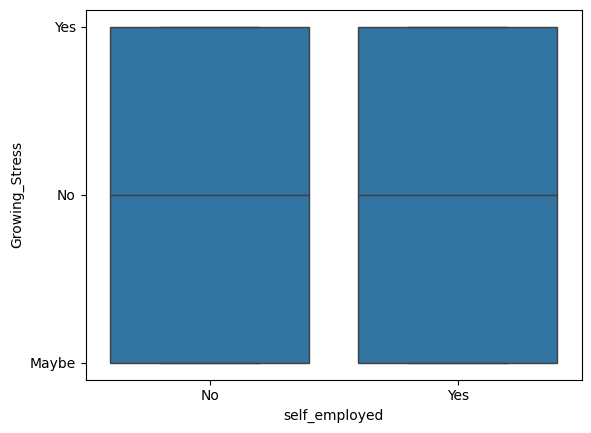

In [7]:
sns.boxplot(x='self_employed', y='Growing_Stress', data=df2)
plt.show()

***We will create three plt.show related to the columns of self_employed, Mental_Health_History, and Mood_Swings.***

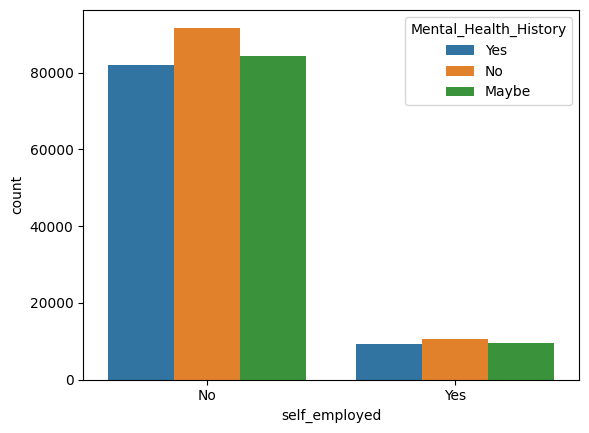

In [8]:
sns.countplot(x='self_employed', hue='Mental_Health_History', data=df2)
plt.show()

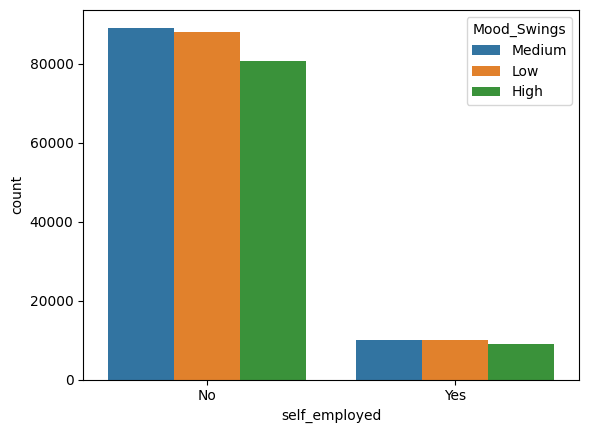

In [9]:
sns.countplot(x='self_employed', hue='Mood_Swings', data=df2)
plt.show()

***Here we will perform data imputation with the self_employed column, which has null values, involving our predictor columns, which are Growing_Stress and Mental_Health_History. We will impute the values and store them in df2.***

In [10]:

# Separar las filas con valores nulos en self_employed y aquellas que no son nulas
df2_train = df2[df2['self_employed'].notnull()]  # Datos completos
df2_null = df2[df2['self_employed'].isnull()]  # Datos con valores nulos

# Variables predictoras
features = ['Growing_Stress', 'Mental_Health_History']

# X_train: columnas que usarás para predecir, y_train: columna objetivo
X_train = df2_train[features]
y_train = df2_train['self_employed']

X_null = df2_null[features]

# Convertir las columnas categóricas en formato adecuado para el modelo
le_self_employed = LabelEncoder()
le_stress = LabelEncoder()
le_mental_health = LabelEncoder()

# Codificamos solo temporalmente las columnas categóricas para el modelo
X_train_encoded = X_train.copy()
X_train_encoded['Growing_Stress'] = le_stress.fit_transform(X_train['Growing_Stress'])
X_train_encoded['Mental_Health_History'] = le_mental_health.fit_transform(X_train['Mental_Health_History'])
y_train_encoded = le_self_employed.fit_transform(y_train)

X_null_encoded = X_null.copy()
X_null_encoded['Growing_Stress'] = le_stress.transform(X_null['Growing_Stress'])
X_null_encoded['Mental_Health_History'] = le_mental_health.transform(X_null['Mental_Health_History'])

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo usando las filas completas
model.fit(X_train_encoded, y_train_encoded)

# Predecir los valores nulos (esto devuelve valores codificados)
y_pred_encoded = model.predict(X_null_encoded)

# Decodificar las predicciones para que sean valores originales (no numéricos)
y_pred = le_self_employed.inverse_transform(y_pred_encoded)

# Imputar los valores nulos en el DataFrame 'df2' con las predicciones
df2.loc[df2['self_employed'].isnull(), 'self_employed'] = y_pred

# Verifica que ya no haya valores nulos en la columna 'self_employed'
print(df2['self_employed'].isnull().sum())  # Esto debería ser 0 si la imputación fue exitosa


0


***We will use a head to check that the data is correctly imputed.***

In [11]:
#Comprobamos que la columna self employed este bien imputada
df2.head(5)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


***We create a second dataframe copy called df3 to save the progress of the work done previously.***

In [12]:
df3 = df2.copy()
print("df3 Creado")

df3 Creado


***Data transformation: We will transform the categorical columns "self_employed," "family_history," "treatment," and "Coping_Struggles" to numeric values of 0 and 1.***

In [13]:
# Mapeo manual de 'Yes' a 1 y 'No' a 0 en df3
df3['self_employed'] = df3['self_employed'].map({'Yes': 1, 'No': 0})
df3['family_history'] = df3['family_history'].map({'Yes': 1, 'No': 0})
df3['treatment'] = df3['treatment'].map({'Yes': 1, 'No': 0})
df3['Coping_Struggles'] = df3['Coping_Struggles'].map({'Yes': 1, 'No': 0})

# Verifica las transformaciones
print(df3[['self_employed', 'family_history', 'treatment', 'Coping_Struggles']].head())

# Verificar los tipos de datos para asegurarte de que sean enteros
print(df3.dtypes)


   self_employed  family_history  treatment  Coping_Struggles
0              0               0          1                 0
1              0               1          1                 0
2              0               1          1                 0
3              0               1          1                 0
4              0               1          1                 0
Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed               int64
family_history              int64
treatment                   int64
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles            int64
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


***Data transformation: We will transform the categorical columns "Growing_Stress," "Changes_Habits," "Mental_Health_History," "Work_Interest," "Social_Weakness," and "mental_health_interview" into columns with numeric data of 0, 1, and 2.***

In [14]:
# Mapeo manual de 'Yes', 'No', 'Maybe' a 1, 0, 2
mapping = {'No': 0, 'Yes': 1, 'Maybe': 2}

# Aplicar el mapeo a todas las columnas mencionadas
df3['Growing_Stress'] = df3['Growing_Stress'].map(mapping)
df3['Changes_Habits'] = df3['Changes_Habits'].map(mapping)
df3['Mental_Health_History'] = df3['Mental_Health_History'].map(mapping)
df3['Work_Interest'] = df3['Work_Interest'].map(mapping)
df3['Social_Weakness'] = df3['Social_Weakness'].map(mapping)
df3['mental_health_interview'] = df3['mental_health_interview'].map(mapping)

# Verificar las transformaciones
print(df3[['Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 
           'Work_Interest', 'Social_Weakness', 'mental_health_interview']].head())


   Growing_Stress  Changes_Habits  Mental_Health_History  Work_Interest  \
0               1               0                      1              0   
1               1               0                      1              0   
2               1               0                      1              0   
3               1               0                      1              0   
4               1               0                      1              0   

   Social_Weakness  mental_health_interview  
0                1                        0  
1                1                        0  
2                1                        0  
3                1                        2  
4                1                        0  


***We will use a head to check that the data is correctly transformed.***

In [15]:
#Comprobamos los datos cambiados.
df3.head(20)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,0,0,1,1-14 days,1,0,1,Medium,0,0,1,0,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,0,1,1,1-14 days,1,0,1,Medium,0,0,1,0,No
2,2014-08-27 11:32:39,Female,United States,Corporate,0,1,1,1-14 days,1,0,1,Medium,0,0,1,0,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,0,1,1,1-14 days,1,0,1,Medium,0,0,1,2,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,0,1,1,1-14 days,1,0,1,Medium,0,0,1,0,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,0,0,1,1-14 days,1,0,1,Medium,0,0,1,2,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,0,1,1,1-14 days,1,0,1,Medium,0,0,1,0,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,0,0,0,1-14 days,1,0,1,Medium,0,0,1,0,No
8,2014-08-27 12:18:38,Female,United States,Corporate,0,0,0,1-14 days,1,0,1,Medium,0,0,1,0,Not sure
9,2014-08-27 12:37:50,Female,United States,Corporate,0,0,0,1-14 days,1,0,1,Medium,0,0,1,0,No


***Data transformation: Finally, we change the categorical column "care_options" to numeric values of 0, 1, and 2.***

In [16]:
# Mapeo manual de 'Yes', 'No', 'Not sure' a 1, 0, 2
mapping_care_options = {'No': 0, 'Yes': 1, 'Not sure': 2}

# Aplicar el mapeo a la columna 'care_options'
df3['care_options'] = df3['care_options'].map(mapping_care_options)

# Verificar la transformación
print(df3['care_options'].head())


0    2
1    0
2    1
3    1
4    1
Name: care_options, dtype: int64


***Finally, we create a second dataframe copy called df4 to save the progress of the work done previously.***

In [17]:
df4 = df3.copy()
print("df4 Creado")

df4 Creado


***Now we can work on the next phases with our dataframe.***

In [18]:
# Supongamos que tu DataFrame se llama "df"
df4.to_csv('mi_dataset_modificado.csv', index=False)
